 # <ins>**Machine Learning Technologies</ins> - Task 4**: Convoluted Neural Network
__ITMO University__, St. Petersburg, Russia
- Name    : Rahman, Rasyad Rifatan <br>
- ID      : 458029

---

Data:

https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in CNN_and_Transfer_Learning.ipynb and fit neural networks for solving the binary classification task.

Part 1:

1. Build and fit CNN with 3 convolutional layers for binary classification

2. Evaluate accuracy on test data

3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

Part 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.

2. Do the same with one more avaliable pre-trained deep learning model from keras application, for example Xception - https://keras.io/api/applications/.

2. Evaluate accuracy on test data for p.1 and p.2

3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

Part 3*** Contest

(not obligatory)

Train your own classificator with the highest possible accuracy on the test data. You can use any architecture/preprocessing/postprocessing/ensembling approach you want.

One student who will achieve the best score will be awarded with 5A for the course automatically!

NB: you can do the task using torch framework if it more convenient for you

---

## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [12]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [13]:
train = 'train'
val =   'val'
test =  'test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [14]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [15]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 4:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(64))
#     +ReLu
model.add(Activation('relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
model.add(Dense(1))
#     +Sigmoid
model.add(Activation('sigmoid'))


In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              run_eagerly=True)

In [17]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

trained_model = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
312/312 [==============================] - 25s 78ms/step - loss: 0.6022 - accuracy: 0.6638 - val_loss: 0.5293 - val_accuracy: 0.7282
Epoch 2/20
312/312 [==============================] - 37s 119ms/step - loss: 0.5062 - accuracy: 0.7517 - val_loss: 0.4481 - val_accuracy: 0.7961
Epoch 3/20
312/312 [==============================] - 23s 73ms/step - loss: 0.4470 - accuracy: 0.7932 - val_loss: 0.4286 - val_accuracy: 0.8039
Epoch 4/20
312/312 [==============================] - 23s 75ms/step - loss: 0.3966 - accuracy: 0.8242 - val_loss: 0.4213 - val_accuracy: 0.8030
Epoch 5/20
312/312 [==============================] - 23s 74ms/step - loss: 0.3487 - accuracy: 0.8488 - val_loss: 0.3945 - val_accuracy: 0.8285
Epoch 6/20
312/312 [==============================] - 23s 74ms/step - loss: 0.3090 - accuracy: 0.8692 - val_loss: 0.3815 - val_accuracy: 0.8326
Epoch 7/20
312/312 [==============================] - 23s 73ms/step - loss: 0.2754 - accuracy: 0.8807 - val_loss: 0.3661 - val_accuracy

In [18]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [19]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate(test_generator, steps=nb_test_samples // batch_size, verbose=1)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

39/39 [==============================] - 3s 63ms/step - loss: 0.6155 - accuracy: 0.8506
Accuracy on test data: 85.06%


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

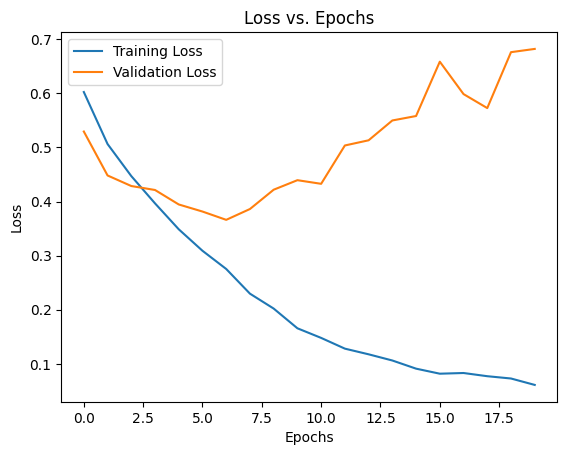

In [20]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(trained_model.history['loss'], label='Training Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

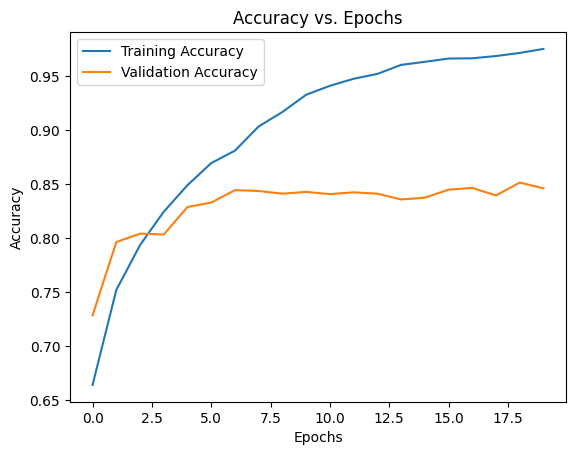

In [21]:
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---

Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [22]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [23]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.5))
# + Dense layer with 1 neuron
model.add(Dense(1))
# + sigmoid
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

E.g., it was like:


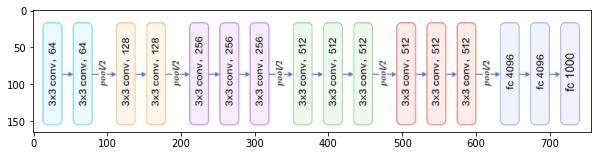

In [ ]:
# img = mpimg.imread('/content/drive/My Drive/VGG16.png')
# plt.figure(figsize = (10,20))
# plt.imshow(img)
# plt.show()

and it becomes:

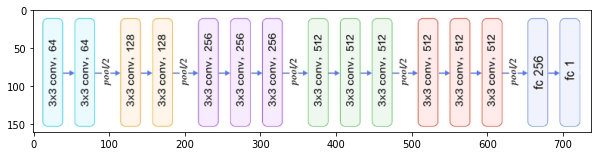

In [ ]:
# img = mpimg.imread('/content/drive/My Drive/VGG162.png')
# plt.figure(figsize = (10,20))
# plt.imshow(img)
# plt.show()

In [25]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

trained_model = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 51s 148ms/step - loss: 0.5074 - accuracy: 0.7429 - val_loss: 0.3563 - val_accuracy: 0.8553
Epoch 2/10
312/312 [==============================] - 44s 140ms/step - loss: 0.3451 - accuracy: 0.8510 - val_loss: 0.3052 - val_accuracy: 0.8795
Epoch 3/10
312/312 [==============================] - 44s 141ms/step - loss: 0.3030 - accuracy: 0.8694 - val_loss: 0.2772 - val_accuracy: 0.8853
Epoch 4/10
312/312 [==============================] - 44s 141ms/step - loss: 0.2765 - accuracy: 0.8830 - val_loss: 0.2599 - val_accuracy: 0.8956
Epoch 5/10
312/312 [==============================] - 44s 141ms/step - loss: 0.2613 - accuracy: 0.8886 - val_loss: 0.2466 - val_accuracy: 0.9034
Epoch 6/10
312/312 [==============================] - 44s 141ms/step - loss: 0.2471 - accuracy: 0.8960 - val_loss: 0.2411 - val_accuracy: 0.9071
Epoch 7/10
312/312 [==============================] - 44s 141ms/step - loss: 0.2385 - accuracy: 0.8987 - val_loss: 0.2368 - val_ac

In [26]:
scores = model.evaluate(test_generator, steps=nb_test_samples // batch_size, verbose=1)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

39/39 [==============================] - 5s 128ms/step - loss: 0.2309 - accuracy: 0.9014
Accuracy on test data: 90.14%


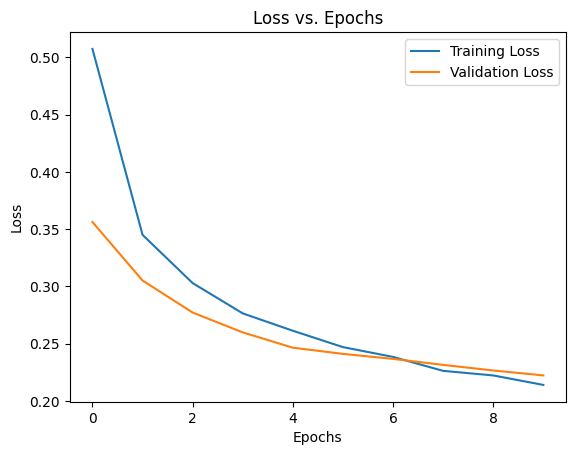

In [27]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(trained_model.history['loss'], label='Training Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

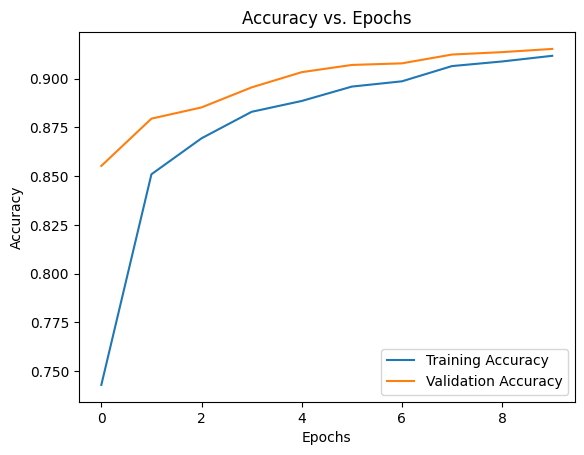

In [ ]:
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---

### **Custom Function to Predict Our Own Pictures**

---

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

def imagePredictor(model, img_path, target_size=(150, 150)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale to match training data

    # Make a prediction
    prediction = model.predict(img_array)
    class_label = "Dog" if prediction[0][0] > 0.5 else "Cat"
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

    return class_label, confidence

Image to Predict:

<img src="mycat.jpg" alt="drawing" width="500"/>

This is a picture of my cat, Jojo!

In [34]:
img_path = 'mycat.jpg'
label, confidence = imagePredictor(model, img_path)
print(f"Predicted Class\t: {label}\nConfidence\t: {confidence:.2f}")

1/1 [==============================] - 0s 25ms/step
Predicted Class	: Cat
Confidence	: 0.90


Image to Predict:

<img src="dog.png" alt="drawing" width="500"/>

As I don't have a dog, this is a picture of a famous online dog, nicknamed Cheems!

In [37]:
img_path = 'dog.png'
label, confidence = imagePredictor(model, img_path)
print(f"Predicted Class\t: {label}\nConfidence\t: {confidence:.2f}")

1/1 [==============================] - 0s 24ms/step
Predicted Class	: Dog
Confidence	: 1.00


---

Part 3*** Contest

(not obligatory)

Train your own classificator with the highest possible accuracy on the test data. You can use any architecture/preprocessing/postprocessing/ensembling approach you want.

One student who will achieve the best score will be awarded with 5A for the course automatically!

NB: you can do the task using torch framework if it more convenient for you

---

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import numpy as np

K.clear_session()

In [2]:
pretrained_model = VGG16(weights='imagenet', 
                         include_top=False, 
                         input_shape=(224, 224, 3))

In [3]:
for layer in pretrained_model.layers[:15]:  # Freeze first 15 layers
    layer.trainable = False

In [4]:
train = 'train'
val =   'val'
test =  'test'

# minibatch size
batch_size = 32
# train set size
nb_train_samples = 20000
# validation set size
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

In [6]:
# Data augmentation
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)

train_gen = datagen.flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = datagen.flow_from_directory(
    val,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [7]:
model = Sequential()

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [9]:
custom_trained_model = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)


Epoch 1/10
625/625 [==============================] - 339s 521ms/step - loss: 0.1693 - accuracy: 0.9290 - val_loss: 0.1387 - val_accuracy: 0.9485
Epoch 2/10
625/625 [==============================] - 110s 176ms/step - loss: 0.0933 - accuracy: 0.9634 - val_loss: 0.1020 - val_accuracy: 0.9602
Epoch 3/10
625/625 [==============================] - 221s 354ms/step - loss: 0.0699 - accuracy: 0.9721 - val_loss: 0.0981 - val_accuracy: 0.9639
Epoch 4/10
625/625 [==============================] - 231s 369ms/step - loss: 0.0561 - accuracy: 0.9778 - val_loss: 0.1036 - val_accuracy: 0.9639
Epoch 5/10
625/625 [==============================] - 112s 179ms/step - loss: 0.0468 - accuracy: 0.9824 - val_loss: 0.1059 - val_accuracy: 0.9651
Epoch 6/10
625/625 [==============================] - 120s 191ms/step - loss: 0.0428 - accuracy: 0.9841 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 7/10
625/625 [==============================] - 120s 191ms/step - loss: 0.0336 - accuracy: 0.9885 - val_loss: 0.1110 -

In [11]:
scores = model.evaluate(test_generator, steps=nb_test_samples // batch_size, verbose=1)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

78/78 [==============================] - 36s 457ms/step - loss: 0.1487 - accuracy: 0.9623
Accuracy on test data: 96.23%
